In this notebook, I'll be exploring the data related to access difficulty, categorizing them, summarizing findings and saving the final results into csv files.

In [35]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
df = pd.read_csv('original_access_data.csv')

In [3]:
# overview
df.describe()

,participant_ID,access_difficulty_none,access_difficulty_language,access_difficulty_physical_disability,access_difficulty_safety_concerns,access_difficulty_transportation,access_difficulty_hours_of_operation,access_difficulty_prefer_not_to_answer,access_difficulty_others
count,4054,1188,600,499,460,1283,796,200,127
unique,4054,1,1,1,1,1,1,1,117
top,ns 757,none of the above,language barriers,physical inaccessibility,safety concerns,transportation barriers,program hours of operation,prefer not to answer,transportation barrier
freq,1,1188,600,499,460,1283,796,200,4


checking out unique values in the other column:

In [4]:
df.access_difficulty_others.unique()

array(['there are times when i run out of bus fare and cannot go.', nan,
       'no i donâ€™t have any difficulty onnassessing food banks',
       'having to schedule', "don't know about other food programs",
       'they have nothing available',
       'my son has limited food that he can eat, unfortunately iâ€™m not able to obtain many items for him',
       'i do not have a car and wont have enough money for bus either. i tried going to a foodbank on bus and told driver and they refused to let me go on bus',
       'my neighborhood selects preferred families to provide service to.',
       "i don't have any problem", 'not knowing any other programs',
       'too tired',
       'most of food bank doesnt give enough food for us as 5 ppl',
       'only one time per month is allowed', 'not information',
       'line ups', 'shy/embarressed',
       'my local food bank is by appointment only and you have to call during monday at 10 am and 2 pm, if you miss that window then you cant attend

In [5]:
# create a dictionary to match "others" values:
match_words = {'dietary/ health concerns': ['starch', 'diet', 'halal', 'nutrition', 'diabetic', 'smoke'] ,
               'social anxiety' : ['anxiety', 'crowds', 'alone'],
               'health issues' : ['health issues', 'accident', 'illness', 'tired'],
                'disability' : ['disabl', 'disabil'],
               'child care' : ['single mom'],
                'documents' : ['address', 'adress','paper', 'document'],
               'language' : ['language', 'newcomer'],
               'no reminders' : ['remind', 'forget'],
                'no accommodations for sensory disabilities' : ['sensory'],
               'financial barriers' : ['bus fare', 'financial', 'money'],
               'pride' : ['pride', 'embar', 'race'],
               'prefer not to answer' : ['prefer not to answer', 'none of this',],
               'hours of operation' : ['when', 'time', 'distance','day', 'appointment', 'for work', 'hour', ],
               'ofb service method': ['appointment', 'location', 'wait times', 'process', 'line up','arrival', 'spots', 'schedul', 'wait'],
               'ofb treatment': ['staff', 'preferred'], 
               'technology barrier': ['system', 'computer', 'schedule'],
               'ofb limits' : ['entitled', 'limit', 'allowed', 'less food', 'month', 'enough', 'small','how much','take on', 'available'],
               'transportation' : ['commute', 'transport','distance','car', 'bus', 'gas', 'walk', 'location'],
                'safety': ['safety', 'bad'],
               'lack of knowledge of available resources': ['told','no idea', 'unaware','newcomer','unable to find', 'not aware', 'know', 'information',],
               'no barriers' : ['no barriers', 'thank', 'i donâ€™t have', 'no difficulty','any difficulty', 'neighbourhood', 'intended', 'any problem']
                    }

In [6]:
# Now, I'll create columns which don't already exist in the original dataframe:
df[['access_difficulty_dietary/ health concerns', 'access_difficulty_social_anxiety', 'access_difficulty_health_issues', 
    'access_difficulty_child_care', 'access_difficulty_documents', 'access_difficulty_pride', 'access_difficulty_no_reminders', 
    'access_difficulty_sensory_disability', 'access_difficulty_technology', 
    'access_difficulty_system_knowledge', 'access_difficulty_OFB_service_method', 'access_difficulty_OFB_limits', 'access_difficulty_OFB_treatment', 'access_difficulty_no_barriers']] = None

In [7]:
# Function to classify answers based on keywords
def classify_barrier(answer, keywords):
    
    if isinstance(answer, str):
        answer_lower = answer.lower()
        matched_options = []
        
        answer_lower = answer_lower.strip().lstrip()
        
        if answer_lower == 'i' or answer_lower == 'n' or answer_lower == 'l':
            answer_lower = 'prefer not to answer'
        
        elif answer_lower == 'no':
            answer_lower = 'no barriers'
            
        for option, keywords in keywords.items():
            if any(keyword in answer_lower for keyword in keywords):
                if option not in matched_options:
                    matched_options.append(option)
        
        terms = ['prefer not to answer', 'no barriers']
    
        for term in terms:
         
            if  term in matched_options:
                if len(matched_options) > 1:
                    matched_options.remove(term)
        return '; '.join(matched_options) if matched_options else print(answer)
    
    elif type(answer) == float:
        return answer
       
    return

In [8]:
# Apply the function to map each answer to provided options
df['mapped_access'] = df['access_difficulty_others'].apply(lambda x: classify_barrier(x, match_words))

In [9]:
df.describe(include= 'all')

,participant_ID,access_difficulty_none,access_difficulty_language,access_difficulty_physical_disability,access_difficulty_safety_concerns,access_difficulty_transportation,access_difficulty_hours_of_operation,access_difficulty_prefer_not_to_answer,access_difficulty_others,access_difficulty_dietary/ health concerns,...,access_difficulty_pride,access_difficulty_no_reminders,access_difficulty_sensory_disability,access_difficulty_technology,access_difficulty_system_knowledge,access_difficulty_OFB_service_method,access_difficulty_OFB_limits,access_difficulty_OFB_treatment,access_difficulty_no_barriers,mapped_access
count,4054,1188,600,499,460,1283,796,200,127,0,...,0,0,0,0,0,0,0,0,0,127
unique,4054,1,1,1,1,1,1,1,117,0,...,0,0,0,0,0,0,0,0,0,48
top,ns 757,none of the above,language barriers,physical inaccessibility,safety concerns,transportation barriers,program hours of operation,prefer not to answer,transportation barrier,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lack of knowledge of available resources
freq,1,1188,600,499,460,1283,796,200,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


In [10]:
# info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   participant_ID                              4054 non-null   object
 1   access_difficulty_none                      1188 non-null   object
 2   access_difficulty_language                  600 non-null    object
 3   access_difficulty_physical_disability       499 non-null    object
 4   access_difficulty_safety_concerns           460 non-null    object
 5   access_difficulty_transportation            1283 non-null   object
 6   access_difficulty_hours_of_operation        796 non-null    object
 7   access_difficulty_prefer_not_to_answer      200 non-null    object
 8   access_difficulty_others                    127 non-null    object
 9   access_difficulty_dietary/ health concerns  0 non-null      object
 10  access_difficulty_social

In [11]:
#Now we can drop the  other column:
df.drop('access_difficulty_others', axis = 1, inplace = True)

In [12]:
# create a function to consolidate the data:
def consolidate_row(row):
    """ 
    Consolidate answers from a DataFrame row, excluding the first and last columns.

    This function processes a row from a DataFrame to:
    1. Create a list of consolidated answers from specified columns, excluding the "participant_ID" (first column) and the last column.
       - Only non-null and non-empty values are included in the list.
    2. Count the number of answers provided.
    3. If the consolidated list contains "prefer not to answer", the list is updated to contain only this value.
    4. Return the consolidated answers as a single string and the count of answers.

    Parameters:
    row (pd.Series): A row from a DataFrame containing answers to be consolidated.

    Returns:
    tuple: A tuple containing:
           - A string of consolidated answers, joined by '; '.
           - An integer count of the number of answers provided.
    """
        
    consolidated = []
    
    # Loop through the specified columns excluding the "participant_ID" :
    for value in row.iloc[1:]:
        
        if pd.notna(value)  and value != '':
            values = value.split(';')
            for value in values:
                if value not in consolidated:
                    consolidated.append(value)
    
    if len(consolidated) == 0:
        consolidated_answer = 'prefer not to answer'
        number_of_answers = 0
    
    else:
        consolidated_answer = ';'.join(consolidated)
    
        # finding out how many answers were provided:
        number_of_answers = len(consolidated_answer.split(';'))
            
   
        terms = ['prefer not to answer', 'no barriers']
    
        for term in terms:
            if  term in consolidated:
                if number_of_answers > 1:
                    consolidated.remove(term)
                    number_of_answers = len(consolidated)
        
        consolidated_answer = ';'.join(consolidated)
    
            
    
    return consolidated_answer, number_of_answers

In [13]:
# Apply the consolidate_row function to each row and create new columns:
df[['access_difficulty_consolidated', 'number_of_barriers']] = df.apply(
        lambda row: pd.Series(consolidate_row(row)), axis=1 )

In [14]:
df.describe(include = 'all')

,participant_ID,access_difficulty_none,access_difficulty_language,access_difficulty_physical_disability,access_difficulty_safety_concerns,access_difficulty_transportation,access_difficulty_hours_of_operation,access_difficulty_prefer_not_to_answer,access_difficulty_dietary/ health concerns,access_difficulty_social_anxiety,...,access_difficulty_sensory_disability,access_difficulty_technology,access_difficulty_system_knowledge,access_difficulty_OFB_service_method,access_difficulty_OFB_limits,access_difficulty_OFB_treatment,access_difficulty_no_barriers,mapped_access,access_difficulty_consolidated,number_of_barriers
count,4054,1188,600,499,460,1283,796,200,0,0,...,0,0,0,0,0,0,0,127,4054,4054.000000
unique,4054,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,48,99,NaN
top,ns 757,none of the above,language barriers,physical inaccessibility,safety concerns,transportation barriers,program hours of operation,prefer not to answer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lack of knowledge of available resources,none of the above,NaN
freq,1,1188,600,499,460,1283,796,200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1187,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280464
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759529
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [15]:
# Since all mapped food types are in the consolidated column, i'll drop the mapped column:
df.drop('mapped_access', axis = 1, inplace = True)

In [16]:
df.columns

Index(['participant_ID', 'access_difficulty_none',
       'access_difficulty_language', 'access_difficulty_physical_disability',
       'access_difficulty_safety_concerns', 'access_difficulty_transportation',
       'access_difficulty_hours_of_operation',
       'access_difficulty_prefer_not_to_answer',
       'access_difficulty_dietary/ health concerns',
       'access_difficulty_social_anxiety', 'access_difficulty_health_issues',
       'access_difficulty_child_care', 'access_difficulty_documents',
       'access_difficulty_pride', 'access_difficulty_no_reminders',
       'access_difficulty_sensory_disability', 'access_difficulty_technology',
       'access_difficulty_system_knowledge',
       'access_difficulty_OFB_service_method', 'access_difficulty_OFB_limits',
       'access_difficulty_OFB_treatment', 'access_difficulty_no_barriers',
       'access_difficulty_consolidated', 'number_of_barriers'],
      dtype='object')

In [17]:
# first, I'll set all values in the desired columns to 0
df.iloc[:, 1:-2] = 0

In [18]:
# Now, I am going to replace the values in each column: 1 is indicated in the column that matches any of the consoldiated value:
for x in df.index:
    values = df.access_difficulty_consolidated.iloc[x].split(';')
    
    dictionary_words = {'none of the above': df.columns[1],
                     'language' : df.columns[2],
                     'disability' : df.columns[3],
                     'safety' : df.columns[4],
                     'transportation' : df.columns[5],
                     'hours' : df.columns[6],
                     'prefer': df.columns[7],
                     'dietary' : df.columns[8],
                     'social anxiety' : df.columns[9],
                     'health issues': df.columns[10],
                     'child care': df.columns[11],
                     'documents' : df.columns[12],
                     'pride' : df.columns[13],
                    'no reminders' : df.columns[14],
                    'technology': df.columns[15],
                    'sensory' : df.columns[16],
                    'lack': df.columns[17],
                   'ofb service' : df.columns[18],
                     'ofb limits': df.columns[19],
                    'ofb treatment': df.columns[20],
                    'no barriers' : df.columns[21],
                     }
    
    # ensuring when 'prefer not to answer' is the answer, we only get 1 in that column.
    if 'prefer not to answer' in values:
        df.iloc[x, 7] = 1

    
    # filling in 1 in matching columns:
    else:
        for value in values:
                        
            for key in dictionary_words.keys():
                if key in value:
                    column = dictionary_words[key]
                    df.loc[x, [column]] = 1
    

In [19]:
df.describe(include = 'all')

,participant_ID,access_difficulty_none,access_difficulty_language,access_difficulty_physical_disability,access_difficulty_safety_concerns,access_difficulty_transportation,access_difficulty_hours_of_operation,access_difficulty_prefer_not_to_answer,access_difficulty_dietary/ health concerns,access_difficulty_social_anxiety,...,access_difficulty_no_reminders,access_difficulty_sensory_disability,access_difficulty_technology,access_difficulty_system_knowledge,access_difficulty_OFB_service_method,access_difficulty_OFB_limits,access_difficulty_OFB_treatment,access_difficulty_no_barriers,access_difficulty_consolidated,number_of_barriers
count,4054,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,...,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054.0,4054,4054.000000
unique,4054,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99,NaN
top,ns 757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none of the above,NaN
freq,1,2866.0,3453.0,4050.0,3593.0,2763.0,3238.0,3671.0,4047.0,4050.0,...,4050.0,4052.0,4053.0,4026.0,4034.0,4033.0,4051.0,4048.0,1187,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.280464
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759529
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   participant_ID                              4054 non-null   object
 1   access_difficulty_none                      4054 non-null   object
 2   access_difficulty_language                  4054 non-null   object
 3   access_difficulty_physical_disability       4054 non-null   object
 4   access_difficulty_safety_concerns           4054 non-null   object
 5   access_difficulty_transportation            4054 non-null   object
 6   access_difficulty_hours_of_operation        4054 non-null   object
 7   access_difficulty_prefer_not_to_answer      4054 non-null   object
 8   access_difficulty_dietary/ health concerns  4054 non-null   object
 9   access_difficulty_social_anxiety            4054 non-null   object
 10  access_difficulty_health

Now, I'll create bins for number of diseases:

In [21]:
# I will create a summary where # of food types is categorized into more generic bins:
bins = {
    'prefer not to answer': df.access_difficulty_prefer_not_to_answer == 1,
    'none of the above' : df.access_difficulty_none == 1 ,
    'no barriers': df.access_difficulty_no_barriers  == 1,
    'ofb limitations' : (df.access_difficulty_hours_of_operation == 1) | (df.access_difficulty_OFB_treatment == 1)
                  | (df.access_difficulty_OFB_limits == 1) | (df.access_difficulty_OFB_service_method == 1),
    '1-2': (df.number_of_barriers == 1) | (df.number_of_barriers ==2),
    '3+': df.number_of_barriers >= 3,
}

In [22]:
# Create a new column in the DataFrame
df['barriers_bin'] = np.select(list(bins.values()),list(bins.keys()), default='unknown')

In [23]:
# save the dataframe as a csv file.
df.to_csv('NS_access_mapped_consolidated_binned.csv', index = False)

In [24]:
# create a quick summary:
overall_summary = df.iloc[:, -2:].groupby('barriers_bin').count().sort_values(by = 'number_of_barriers', ascending = False)

In [25]:
# view results:
overall_summary

,number_of_barriers
barriers_bin,
1-2,1528
none of the above,1188
ofb limitations,836
prefer not to answer,383
3+,113
no barriers,6


In [26]:
# changing the column name:
overall_summary.columns = ['total']

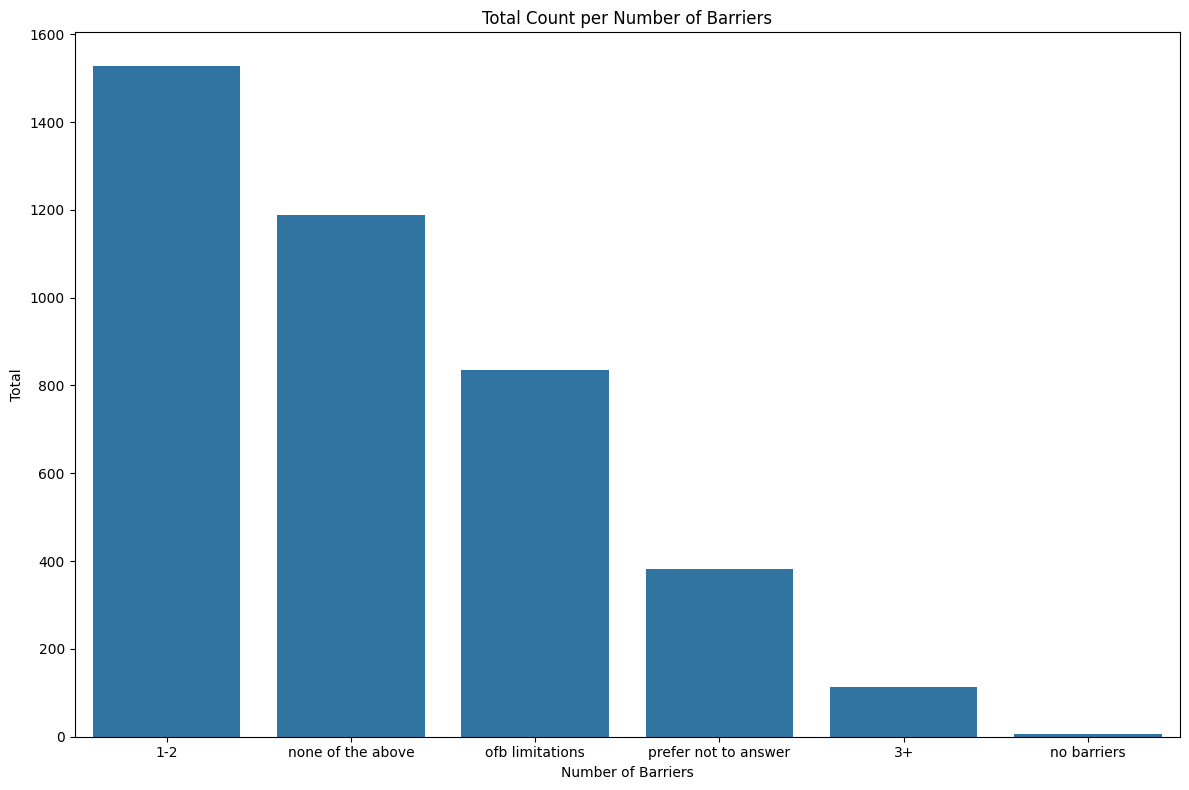

In [27]:
# plotting the overall_summary results:

plt.figure(figsize=(12, 8))
sns.barplot(
    data= overall_summary,
    x ='barriers_bin',
    y ='total',
    errorbar=None
)

#plt.xticks(rotation=90)
plt.xlabel('Number of Barriers')
plt.ylabel('Total')
plt.title('Total Count per Number of Barriers')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('access_number_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [28]:
# save the above summary into a csv file:
overall_summary.to_csv('binned_access.csv')

In [29]:
# summary of categories counts in total without bins:
summary = {}
for column in df.columns[1:-3]:
    barrier = column.split('_')
    barrier = ' '.join(barrier[2:])
    
    if barrier == 'none':
        barrier = 'none of the above'
    
    summary.update({barrier: df[column].sum(axis = 0)})

In [30]:
# create dataframe:
df_summary = pd.DataFrame({'barrier' : summary.keys(),
             'total' : summary.values()})

In [31]:
# sort data:
df_summary = df_summary.sort_values(by = 'total', ascending = False)

In [32]:
df_summary

,barrier,total
4,transportation,1291
0,none of the above,1188
5,hours of operation,816
1,language,601
3,safety concerns,461
6,prefer not to answer,383
16,system knowledge,28
18,OFB limits,21
17,OFB service method,20
7,dietary/ health concerns,7


In [33]:
# save the summary above into a csv file:
df_summary.to_csv('barriers_summary.csv', index = False)

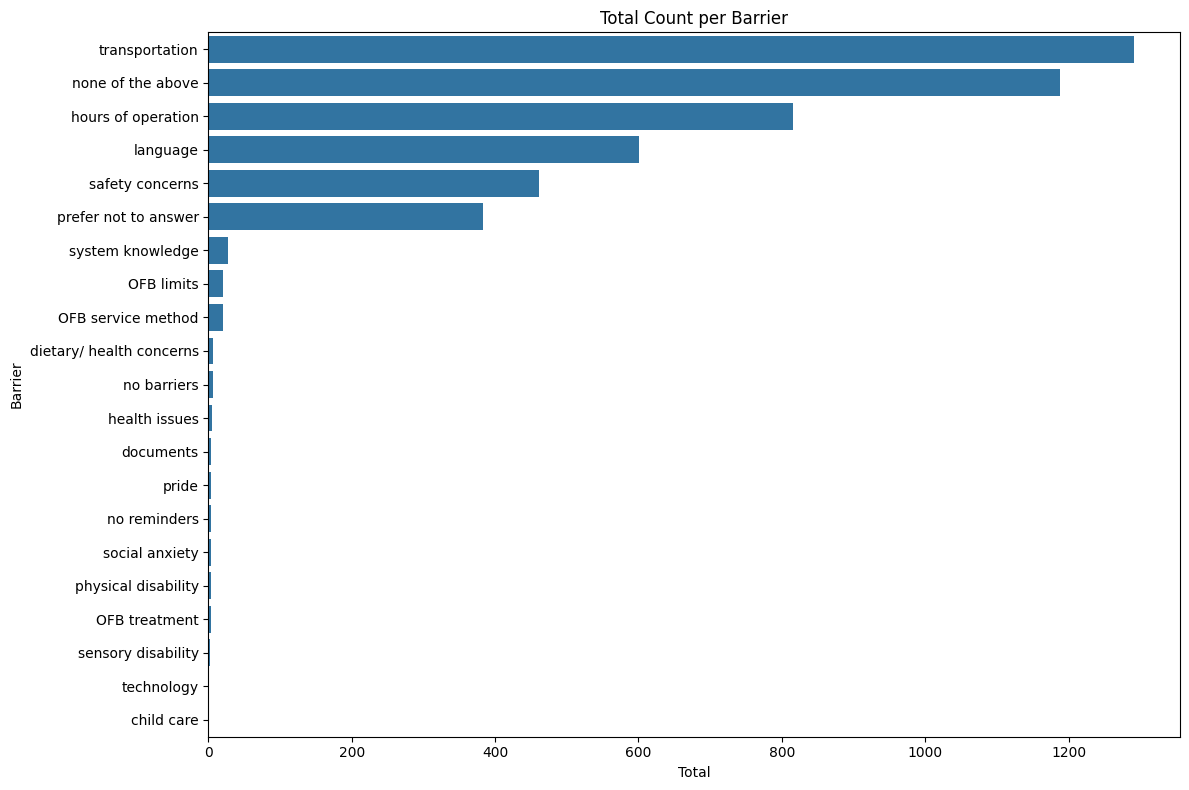

In [34]:
# plotting the df_summary results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= df_summary,
    y ='barrier',
    x ='total',
    errorbar=None
)


plt.ylabel('Barrier')
plt.xlabel('Total')
plt.title('Total Count per Barrier')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('access_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()